# Flare 2023/06/09

In [1]:
import numpy as np
# import copy
# import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
# import sunpy
# from scipy.io import readsav
# import cocopy as cp
# from ISPy.io import solarnet
# import sunpy.map
# import astropy.units as u
# from scipy.io import readsav as rs
# from PIL import Image, ImageEnhance
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
# import datetime as dt
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from matplotlib.collections import PolyCollection
import sys
sys.path.append('E:/solar flares/data/2017-09-06')
import use_nessi3 as un

In [2]:
import os

# Specify the path to the folder you want to list files from
folder_path = "E:/solar flares/data/2023-06-09/fits/"

maximum = 1000 # to be determined 

def timeframe_to_filename_fits(frame):
    if frame <0 or frame > maximum:
        raise IndexError(f'frame number {frame} is not in [0, {max}).')
    else:
        return f"{folder_path}nb_8542_2023-06-09T17_01_07_17_01_07=0-57_stokes_corrected_export2023-07-25T11_24_17_im.fits"
ttff = timeframe_to_filename_fits



In [3]:
head0 = f.getheader(ttff(0))
maximum = head0['NAXIS5']
head0

SIMPLE  =                    T / Written by IDL:  Thu Jun 22 12:31:31 2023      
BITPIX  =                  -32 /                                                
NAXIS   =                    5 / Number of data axes                            
NAXIS1  =                 2780 / Number of positions along axis 1               
NAXIS2  =                 2773 / Number of positions along axis 2               
NAXIS3  =                   27 / Number of positions along axis 3               
NAXIS4  =                    4 / Number of positions along axis 4               
NAXIS5  =                   58 / Number of positions along axis 5               
EXTEND  =                    T / The file has extension(s).                     
PC1_1   =              1.00000 / No rotations                                   
PC2_2   =              1.00000 / No rotations                                   
PC3_3   =              1.00000 / No rotations                                   
PC4_4   =              1.000

In [4]:
with f.open(timeframe_to_filename_fits(0)) as io :
    print(io)
    print(len(io))
    for i, hdl in enumerate(io):
        print(f'\n next hdl number {i} : {hdl}')
        print(np.shape(hdl.data))
        print(hdl.data[0][0])
    tlist2 = io[5].data
    pos = io[1].data

# shape data: [(58, 1, 33, 2773, 2783)-data,  positons , array SIM_XY????, date and time frames,  
# (58, 1, 1, 2773, 2783)-data, terug date+time frames, nog eens date+time frames, en nog eens, array orde e10,  
# frame umbers , ....     errors?,  errors?]


wvl = pos[0][0][:,:,0,0,2][0]*10
np.save('line_data/wav_sstCaIR.npy', wvl)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001BB77944DA0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001BB77926F60>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001BB779276B0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001BB77927E00>, <astropy.io.fits.hdu.image.ImageHDU object at 0x000001BB779440B0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001BB77944B60>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001BB7796AF60>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001BB7796B6B0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001BB7796BE00>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001BB77970590>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001BB77971100>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001BB77971A30>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001BB77972360>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001BB77972AB0>, <astropy.io.fits.hdu.ta

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]

 next hdl number 5 : <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001BB77944B60>
(1,)
[[[[['2023-06-09T17:01:08.69067']]

   [['2023-06-09T17:01:09.43560']]

   [['2023-06-09T17:01:10.16963']]

   ...

   [['2023-06-09T17:01:26.36973']]

   [['2023-06-09T17:01:27.10585']]

   [['2023-06-09T17:01:27.83177']]]]



 [[[['2023-06-09T17:02:02.21554']]

   [['2023-06-09T17:02:02.95194']]

   [['2023-06-09T17:02:03.68821']]

   ...

   [['2023-06-09T17:02:19.93905']]

   [['2023-06-09T17:02:20.67545']]

   [['2023-06-09T17:02:21.41203']]]]



 [[[['2023-06-09T17:02:56.03752']]

   [['2023-06-09T17:02:56.77150']]

   [['2023-06-09T17:02:57.50769']]

   ...

   [['2023-06-09T17:03:13.80917']]

   [['2023-06-09T17:03:14.54539']]

   [['2023-06-09T17:03:15.28174']]]]



 ...



 [[[['2023-06-09T17:50:20.11822']]

   [['2023-0

In [5]:
pos[0][0][:,:,0,0,2][0]

array([854.00958491, 854.02958491, 854.04958491, 854.06958491,
       854.08958491, 854.10958491, 854.13958491, 854.15458491,
       854.16958491, 854.17758491, 854.18558491, 854.19358491,
       854.20158491, 854.20958491, 854.21758491, 854.22558491,
       854.23358491, 854.24158491, 854.24958491, 854.26458491,
       854.27958491, 854.30958491, 854.32958491, 854.34958491,
       854.36958491, 854.38958491, 854.40958491], dtype='>f8')

In [6]:
tlist = np.array(tlist2[0])
tlist3 = tlist[0,:,0,0,0, 0]
tlist3[2][17:], tlist3

('56.03752',
 array(['2023-06-09T17:01:08.69067', '2023-06-09T17:02:02.21554',
        '2023-06-09T17:02:56.03752', '2023-06-09T17:03:49.84217',
        '2023-06-09T17:04:43.48924', '2023-06-09T17:05:36.93205',
        '2023-06-09T17:06:30.54838', '2023-06-09T17:07:24.31656',
        '2023-06-09T17:08:17.97311', '2023-06-09T17:09:11.43874',
        '2023-06-09T17:10:05.07801', '2023-06-09T17:10:58.87178',
        '2023-06-09T17:11:52.58480', '2023-06-09T17:12:46.27231',
        '2023-06-09T17:13:39.78006', '2023-06-09T17:14:33.57630',
        '2023-06-09T17:15:27.32362', '2023-06-09T17:16:20.79431',
        '2023-06-09T17:17:14.50557', '2023-06-09T17:18:08.25250',
        '2023-06-09T17:19:01.69098', '2023-06-09T17:19:55.48245',
        '2023-06-09T17:20:49.27412', '2023-06-09T17:21:42.96951',
        '2023-06-09T17:22:36.50440', '2023-06-09T17:23:29.95084',
        '2023-06-09T17:24:23.75145', '2023-06-09T17:25:17.56641',
        '2023-06-09T17:26:11.07862', '2023-06-09T17:27:04.57511

In [7]:
time_list = [t[11:] for t in tlist3]
time_list

['17:01:08.69067',
 '17:02:02.21554',
 '17:02:56.03752',
 '17:03:49.84217',
 '17:04:43.48924',
 '17:05:36.93205',
 '17:06:30.54838',
 '17:07:24.31656',
 '17:08:17.97311',
 '17:09:11.43874',
 '17:10:05.07801',
 '17:10:58.87178',
 '17:11:52.58480',
 '17:12:46.27231',
 '17:13:39.78006',
 '17:14:33.57630',
 '17:15:27.32362',
 '17:16:20.79431',
 '17:17:14.50557',
 '17:18:08.25250',
 '17:19:01.69098',
 '17:19:55.48245',
 '17:20:49.27412',
 '17:21:42.96951',
 '17:22:36.50440',
 '17:23:29.95084',
 '17:24:23.75145',
 '17:25:17.56641',
 '17:26:11.07862',
 '17:27:04.57511',
 '17:27:58.37766',
 '17:28:52.26499',
 '17:29:45.85048',
 '17:30:39.34357',
 '17:31:33.05179',
 '17:32:26.81212',
 '17:33:20.49318',
 '17:34:13.95797',
 '17:35:07.68667',
 '17:36:01.47519',
 '17:36:55.17597',
 '17:37:48.74821',
 '17:38:42.46317',
 '17:39:36.26995',
 '17:40:29.92652',
 '17:41:23.41729',
 '17:42:17.11027',
 '17:43:10.92557',
 '17:44:04.55836',
 '17:44:58.02297',
 '17:45:51.70751',
 '17:46:45.48093',
 '17:47:39.0

In [8]:
def datacube(timeframe):
    if timeframe < maximum and timeframe >= 0:
        return f.getdata(ttff(timeframe))[timeframe][0] # TODO: werk hier verder
    else:
        raise IndexError(
            f"Timeframe {timeframe} is negative or exeeds numer of frames {maximum}."
        )

In [9]:
print(np.any(np.isnan(datacube(0)[0,:,:])), np.shape(datacube(0)))
print(f"the maximum attained value in frame 0 is {np.max(datacube(0))} and the 98 percile is {np.percentile(datacube(0), 98)}")
datacube(0)[::3, ::100, ::100]

True (27, 2773, 2780)
the maximum attained value in frame 0 is nan and the 98 percile is nan


array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

E:/solar flares/data/2023-06-09/fits/nb_8542_2023-06-09T17_01_07_17_01_07=0-57_stokes_corrected_export2023-07-25T11_24_17_im.fits
s=(27, 2773, 2780)
the shape of the data is (58, '??', 27, 2773, 2780)
the wavelengths are self._wavel = array([8540.09584908, 8540.29584908, 8540.49584908, 8540.69584908,
       8540.89584908, 8541.09584908, 8541.39584908, 8541.54584908,
       8541.69584908, 8541.77584908, 8541.85584908, 8541.93584908,
       8542.01584908, 8542.09584908, 8542.17584908, 8542.25584908,
       8542.33584908, 8542.41584908, 8542.49584908, 8542.64584908,
       8542.79584908, 8543.09584908, 8543.29584908, 8543.49584908,
       8543.69584908, 8543.89584908, 8544.09584908])
Boundary
Blue=Outside, yellow=Inside


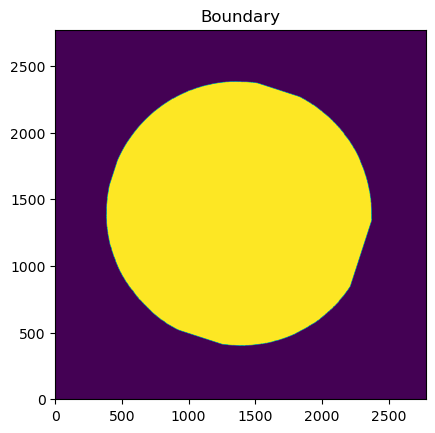

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
reload(un)

vertices = [(600, 60), (40, 823), (832, 1400), (1280, 770)]

CaIR = un.SST_data_from_multiple_fits_files(timeframe_to_filename_fits,spectfilename='line_data/wav_sstCaIR.npy', number_of_frames=maximum,
                 time=time_list, name_of_line='CaIR23', thresh=[0, np.percentile(datacube(0), 99.5)],  boundary_methode='search', 
                 boundary_arguments = {"error":0.01}, with_stokes=True, with_time=True, alternative_datacube=datacube)

# CaIR.datacube
# np.shape(CaIR.datacube), CaIR.datacube(0)[0:30:5,10:20:5, 100:200:30], 
CaIR.boundary


In [11]:
# CaIR.calculate__FOV_spect_over_time()

In [12]:
secs = un.get_TIME(CaIR)*60
dt = secs[1:]-secs[:-1]
print(f"the mean cadence is {np.average(dt)} seconds for this line!")
print(f'{CaIR.shape=}')

the mean cadence is 53.666666666666565 seconds for this line!
CaIR.shape=(58, '??', 27, 2773, 2780)


The guessed filters are [[4.0, 3.375], [13.0, 3.375], [22.0, 3.375]]


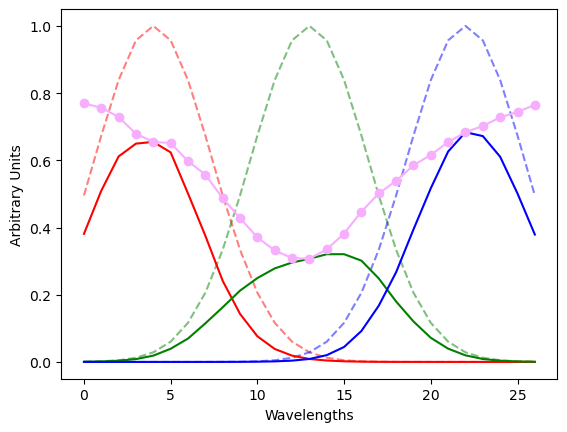

In [13]:
# %matplotlib inline
CaIR.update_filters(None)# [[3,2], [7,2], [11,2]]
CaIR.plot_filt(880,900)
plt.show()

the number of frames is 58
frame number 0 at time 17:01:08.69067


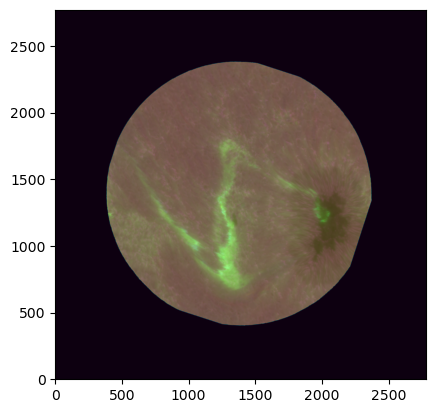

(2773, 2780, 3)


In [14]:
# %matplotlib widget
print(f'the number of frames is {CaIR._number_of_frames}')
for frame in range(0 ,CaIR._number_of_frames, 60):
    # frame=0
    CaIR.ccp_frame(frame,Show=False)
    print(f'frame number {frame} at time {CaIR._time[frame]}')
    plt.imshow(CaIR.current_ccp, origin='lower')
    plt.imshow(CaIR.calculate_boundary(frame=frame), alpha=0.2, origin="lower")

    # plt.imshow(CaIR.boundary, origin='lower', alpha=0.2)
    plt.show()
    print(np.shape(CaIR.current_ccp))#,np.shape(CaIR.boundary))

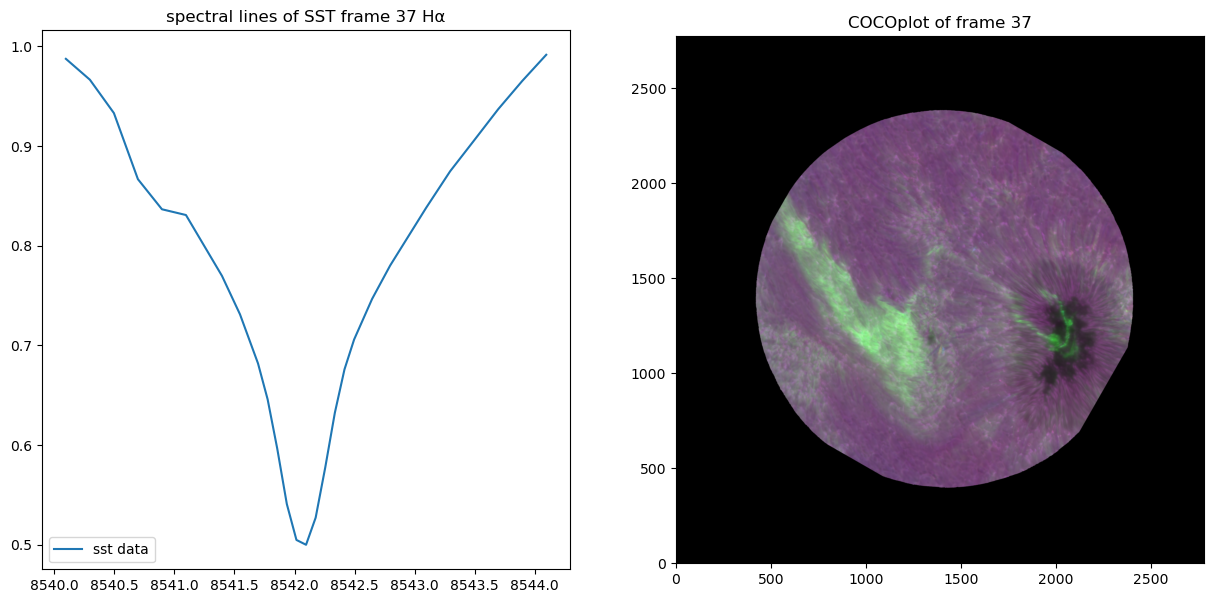

In [15]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# plt.title('frame 40 jeweet')

frame = 37
CaIR.ccp_frame(frame,Show=False)


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1")
CaIR.frame_integrated_spect(frame)
ax[0].plot(CaIR._wavel, CaIR.av_spect, label='sst data')
ax[0].legend()
ax[1].imshow(Image.fromarray(CaIR.current_ccp), origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
plt.show()


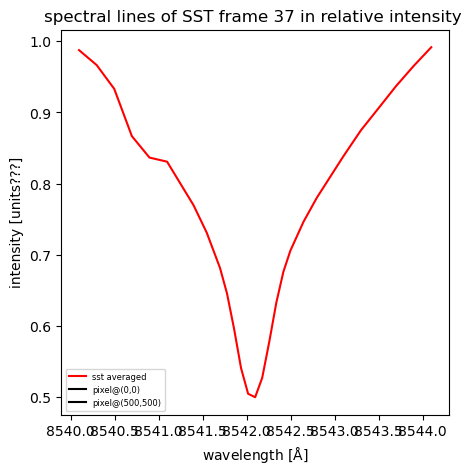

In [16]:
CaIR.current_ccp[0:30:10,0:60:20,:]
CaIR.plot_integrate_spectr(frame, pixels=[[0,0],[500,500]])

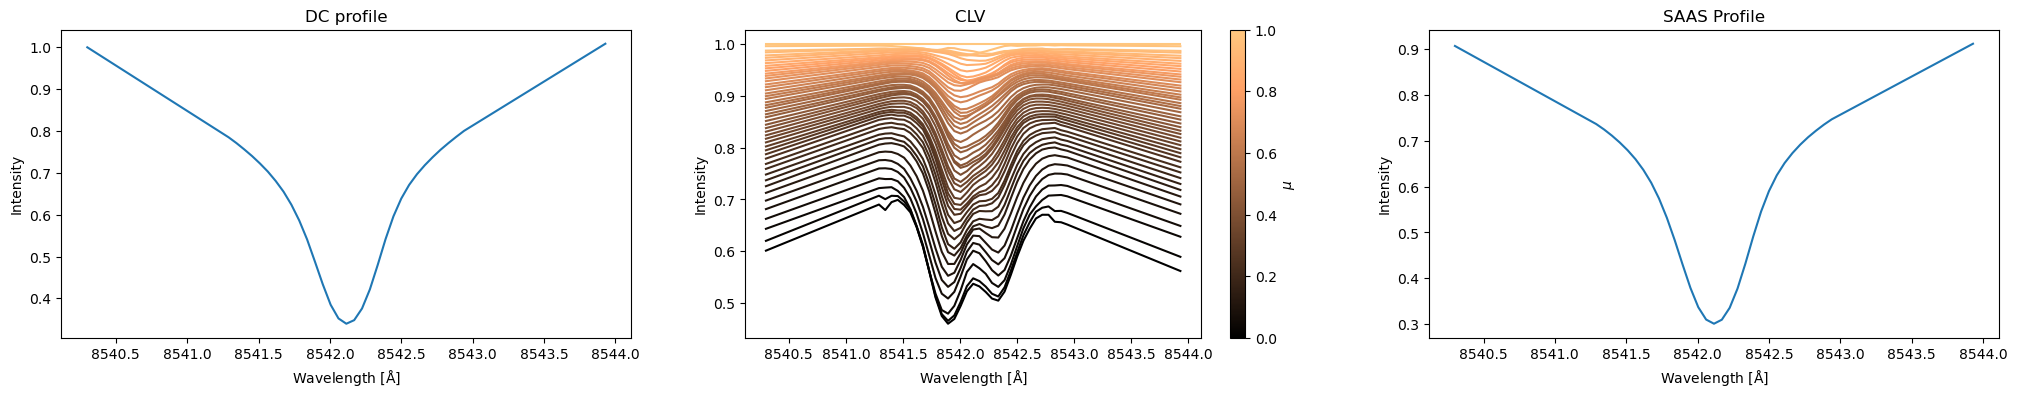

8542.114877954633 8542.114877954633


In [17]:
reload(un)
theor_CaIR = un.linestudier('E:/solar flares/data/2017-09-06/fits/8542_clv.fits', atlas=None, nr=101)
print(np.median(theor_CaIR.sst_wav), np.mean(theor_CaIR.sst_wav))

## Calculating the $\mu$ !!!!! 


In [18]:
CaIR.shape

(58, '??', 27, 2773, 2780)

In [19]:
def add_enters(s, length_row):
    n = 0
    while n+length_row <len(s):
        n += length_row
        s = s[:n] +'\n' + s[n:]
        n += 2
    return s

with f.open(CaIR.filename) as io:
    for i, hdu in enumerate(io):
        # print(f"HDU {i+1}:")
        print(add_enters(str(hdu.header), length_row=79))
        try: 
            x= hdu.header['CRVAL1A']
            y = hdu.header['CRVAL2A']
            print("x =", x, "y=", y)
            pix_x= hdu.header['CRPIX1A']
            pix_y = hdu.header['CRPIX2A']
            print("middel pixel x =", pix_x, "middel pixel y =", pix_y)
        except KeyError:
            # raise(KeyError)
            pass


SIMPLE  =                    T / Written by IDL:  Thu Jun 22 12:31:31 2023     
 BITPIX  =                  -32 /                                               
 NAXIS   =                    5 / Number of data axes                           
 NAXIS1  =                 2780 / Number of positions along axis 1              
 NAXIS2  =                 2773 / Number of positions along axis 2              
 NAXIS3  =                   27 / Number of positions along axis 3              
 NAXIS4  =                    4 / Number of positions along axis 4              
 NAXIS5  =                   58 / Number of positions along axis 5              
 EXTEND  =                    T / The file has extension(s).                    
 PC1_1   =              1.00000 / No rotations                                  
 PC2_2   =              1.00000 / No rotations                                  
 PC3_3   =              1.00000 / No rotations                                  
 PC4_4   =              1.000

In [20]:
xy = pos[0][0][:,:,:,:, :2]
# seems to be centers per frame but different from those in the header???
xy, np.shape(xy), xy[29,0]

(array([[[[[-674.16821939, -413.8197918 ],
           [-551.89221939, -413.8197918 ]],
 
          [[-674.16821939, -291.8517918 ],
           [-551.89221939, -291.8517918 ]]],
 
 
         [[[-674.16821939, -413.8197918 ],
           [-551.89221939, -413.8197918 ]],
 
          [[-674.16821939, -291.8517918 ],
           [-551.89221939, -291.8517918 ]]],
 
 
         [[[-674.16821939, -413.8197918 ],
           [-551.89221939, -413.8197918 ]],
 
          [[-674.16821939, -291.8517918 ],
           [-551.89221939, -291.8517918 ]]],
 
 
         ...,
 
 
         [[[-674.16821939, -413.8197918 ],
           [-551.89221939, -413.8197918 ]],
 
          [[-674.16821939, -291.8517918 ],
           [-551.89221939, -291.8517918 ]]],
 
 
         [[[-674.16821939, -413.8197918 ],
           [-551.89221939, -413.8197918 ]],
 
          [[-674.16821939, -291.8517918 ],
           [-551.89221939, -291.8517918 ]]],
 
 
         [[[-674.16821939, -413.8197918 ],
           [-551.89221939, -413.81

width = 180.4725
[-659.04544586 -536.76944586 -414.07151807 -292.10351807]
does MU contain nan's? False
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.6896447835276309 for timeframe 29
Coundourplot succesfully saved.


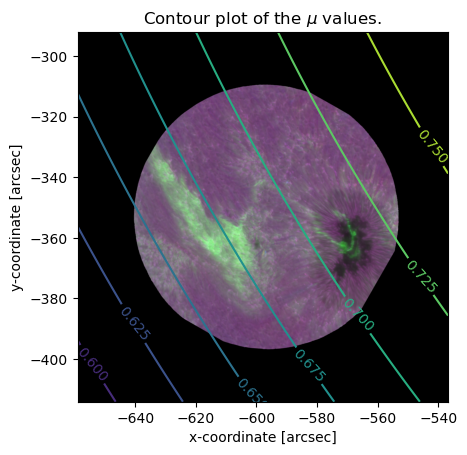

In [21]:
def calculate_mu(x,y, radius=959.63):
    # sourcery skip: inline-immediately-returned-variable
    '''
    Calculates mu given x,y in arseconds the radius of the celestial object is option. 
    The value of the sun is 959.63 arcsec

    mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
    a spot at the celestial objec.
    x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
    of the celestial object.
    '''
    mu  = (1-(x**2 + y**2)/radius**2)**0.5
    return mu

width = 0.13 * np.average(CaIR.shape[-2:])/2
print(f"{width = }")

# or per pixel 0.13 arcsec

position = (x,y)



fxp = np.array(xy[maximum//2,0,0,:,0])
fyp = np.array(xy[maximum//2,0,:,0,1])
fxp = np.concatenate((fxp, fyp))
print(fxp)

x = np.linspace(fxp[0], fxp[1], CaIR.shape[4])
y = np.linspace(fyp[0], fyp[1], CaIR.shape[3])

xx, yy = np.meshgrid(x, y)
xx0=xx
yy0=yy

MU = calculate_mu(xx,yy)
print("does MU contain nan's?", np.any(np.isnan(MU)))


reload(un)

def set_mu(sst_data, mu):
    sst_data.mu = mu

def fix_mu_theor(mu, theor_line):
    x = np.abs(theor_line.sst_mu-mu)
    index_mu = np.where(x == np.min(x))[0]
    theor_line.index_mu = index_mu
    theor_line.best_fit_clv = clv_fit(mu, theor_line)


def clv_fit(mu, theor_line):
    try:
        return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)
    except ValueError:
        x = np.abs(theor_line.sst_mu - mu)
        ind = np.where(x == np.min(x))[0]
        return theor_line.sst_clv[ind]




def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None, save=False, save_name=""):
    '''
    Creates a contourplot of the mu values
    if over is not None but a sst_data class object then the countour plot is shown over the specific frame
    '''
    if over is not None:
        shape=np.shape(over.datacube)[3:5]

    fig, ax = plt.subplots()
    if over is not None:
        over.frame_integrated_spect(timeFrame)
        ax.imshow(Image.fromarray(over.current_ccp), origin='lower', extent=extent)
        B = over.boundary
        B = np.where(B == 1, 1, np.nan)
        K = MU * B
        av_mu = np.nanmean(K)
        print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
    CS = ax.contour(X, Y, MU)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title(r'Contour plot of the $\mu$ values.')
    ax.set_xlabel('x-coordinate [arcsec]')
    ax.set_ylabel('y-coordinate [arcsec]')

        
    if save:
        # Save arrays together
        np.savez(f"line_data/contourdata{save_name}.npz", MU, X[0], Y[:,0], over.current_ccp)
        print("Coundourplot succesfully saved.")
        
    if over is not None:
        return av_mu
 
mu = give_mu_contourplot(MU, xx, yy, fxp, over=CaIR, save=True, save_name=CaIR.name_of_line, timeFrame=maximum//2)
sst_data = CaIR
theor_line = theor_CaIR
set_mu(CaIR, mu)
fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[theor_CaIR.index_mu], theor_line.sst_clv[theor_CaIR.index_mu][0], clv_fit(mu, theor_line)


(278, 278) (278, 278) (277, 277)


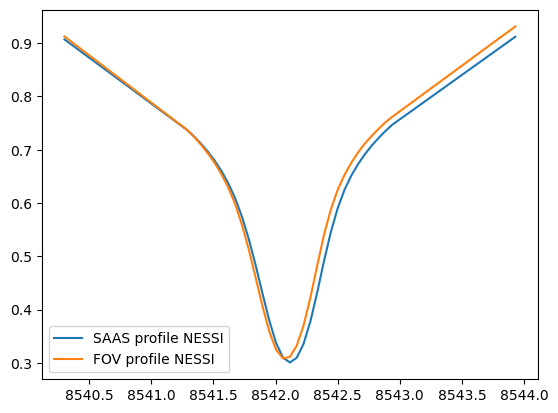

In [22]:
theor_CaIR.set_fov( xx, yy, CaIR.boundary, sr=959.63, reduction=10)



## Finding a suitable quiet sun patch

In [23]:
frame, CaIR.shape

(37, (58, '??', 27, 2773, 2780))

<>:41: SyntaxWarning: invalid escape sequence '\C'
<>:41: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_6432\3636024821.py:41: SyntaxWarning: invalid escape sequence '\C'
  fig.savefig(f'plots\Choosing_quiet_sun_patch_CaIR.png')


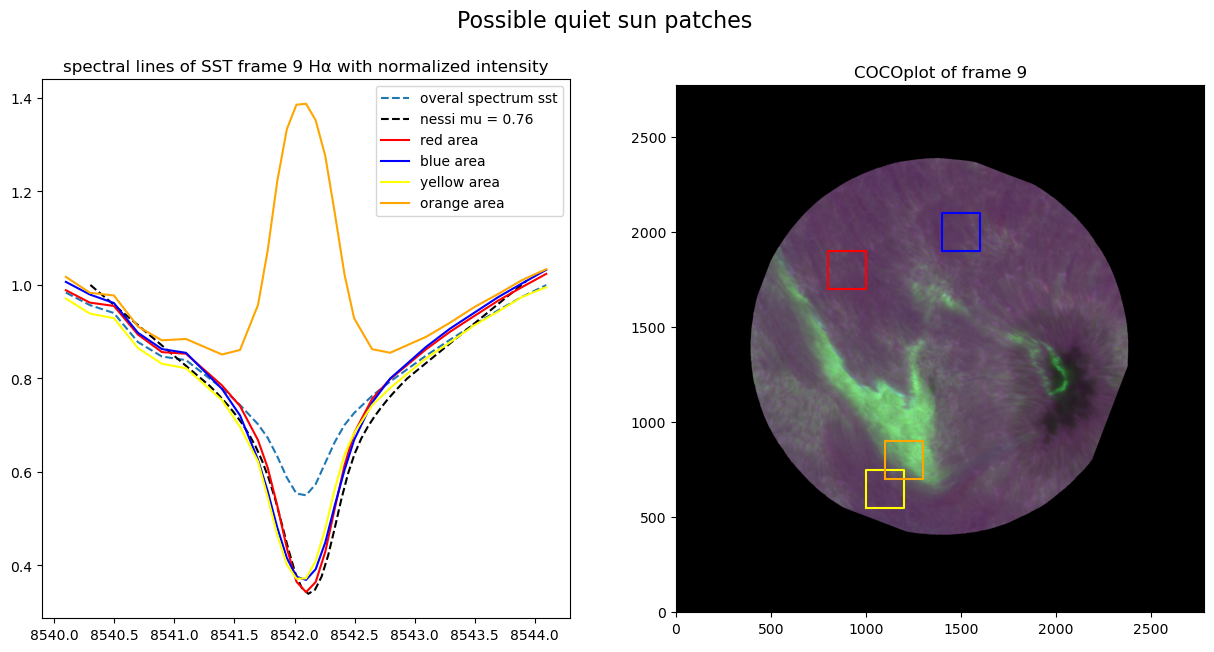

In [24]:
frame=9

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# fig.setitle("quiet sun determination, weiging constants")

fig.suptitle('Possible quiet sun patches', fontsize=16)

CaIR.ccp_frame(frame,Show=False)
# xlim, ylim
X = [[(800,1000),(1700,1900)], [(1400,1600), (1900, 2100)],  [(1000,1200),(550,750)], [(1100,1300),(700, 900)]]
    #  [(90,350), (800,969)] , [(90,290), (870,969)] ]# max x: 963, y: 969
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1 with normalized intensity")
CaIR.frame_integrated_spect(frame)
ax[0].plot(CaIR._wavel, CaIR.av_spect, '--', label='overal spectrum sst')
# ax[0].plot(theor_CaIR.sst_wav + theta[0], theta[2] * theor_CaIR.sst_dc + theta[1], label='saas nessi')
# theta = [ 2.196e-01 , 6.288e-02 , 8.458e-01]
theta = [0,0,1]


ax[0].plot(theor_CaIR.sst_wav + theta[0], theta[2] * theor_CaIR.sst_dc*theor_CaIR.sst_clv[0] + theta[1], '--', label='nessi mu = 0.76', color='black')

ax[1].imshow(CaIR.current_ccp,origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
t=0
for i in X:
    xlim=i[0]
    ylim=i[1]
    if t<len(colors):
        color=colors[t]
    else:
        color = np.array(np.random.choice(range(256), size=3))/255
    t+=1
    ax[0].plot(CaIR._wavel, CaIR.frame_integrated_spect(frame, xlim=xlim, ylim=ylim), color=color, label=str(color)+' area') #
    ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)
ax[0].legend()

# Save the figure
fig.savefig(f'plots\Choosing_quiet_sun_patch_CaIR.png')
plt.show()


### The quiet sun patch

fill in here which color the wanted quiet sun patch had 

In [25]:
color_wanted_patch = 'blue'

the edges of the patch are denoted by the xlim: (1400, 1600) and ylim: (1900, 2100)


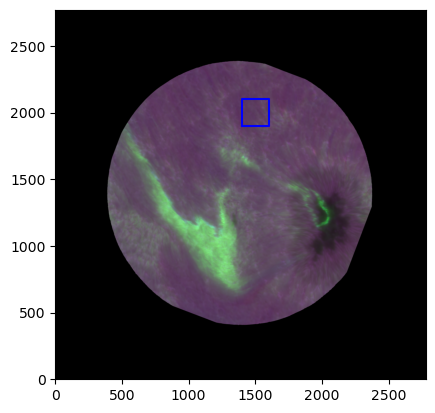

{'frame': 9, 'xlim': (1400, 1600), 'ylim': (1900, 2100), 'color': 'blue'}

In [26]:
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

CaIR.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)
CaIR.quiet_sun

The quiet sun is pick at x (-593.0674458572533, -326.0935180685596) with average              mu 0.7089310631944677


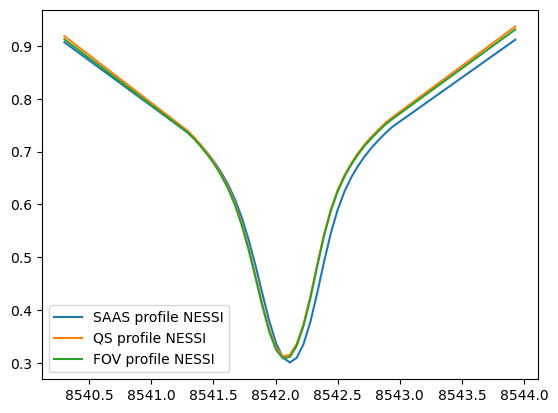

In [27]:
theor_CaIR.set_quiet_sun(xlim=xlim, ylim=ylim)


[8540.09584908 8540.29584908 8540.49584908 8540.69584908 8540.89584908
 8541.09584908 8541.39584908 8541.54584908 8541.69584908 8541.77584908
 8541.85584908 8541.93584908 8542.01584908 8542.09584908 8542.17584908
 8542.25584908 8542.33584908 8542.41584908 8542.49584908 8542.64584908
 8542.79584908 8543.09584908 8543.29584908 8543.49584908 8543.69584908
 8543.89584908 8544.09584908] [1.00660408 0.97955328 0.96136719 0.89779246 0.86282557 0.85484064
 0.77759624 0.72101605 0.62606877 0.5592227  0.48152566 0.41615626
 0.37589175 0.36908269 0.39195448 0.44906801 0.52942616 0.60375422
 0.6682654  0.74847651 0.79968047 0.86771685 0.90683472 0.94046348
 0.97403491 1.00355268 1.03248382] [0.95570647 0.91955687 0.88340728 0.84725768 0.81110808 0.77495849
 0.7132288  0.66395399 0.58646199 0.52384438 0.44825769 0.37490933
 0.32524966 0.31408581 0.34008495 0.40281125 0.48668157 0.56588422
 0.62466181 0.69096222 0.73398976 0.79206037 0.82682272 0.86158508
 0.89634743 0.93110979 0.96587214]
[-0.01902

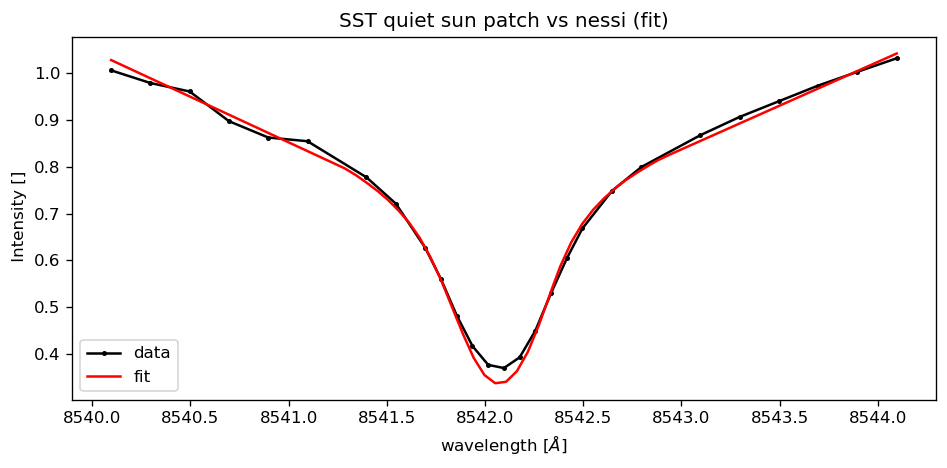

de p-waarde is  0.9645775021237941 
Chi^2 reduced= 13.83229334973405 
aantal vrijheidgraden= 25 
chi^2= 345.80733374335125
we behouden de fit tot op een betrouwbaarheidsniveau van  0.9645775021237941 
Oftewel verwerp als p-waarde <lpha-niveau 


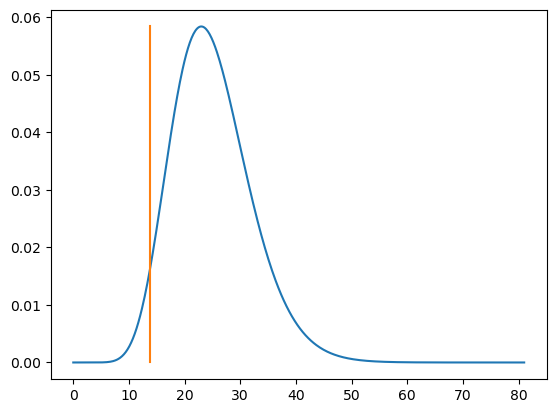

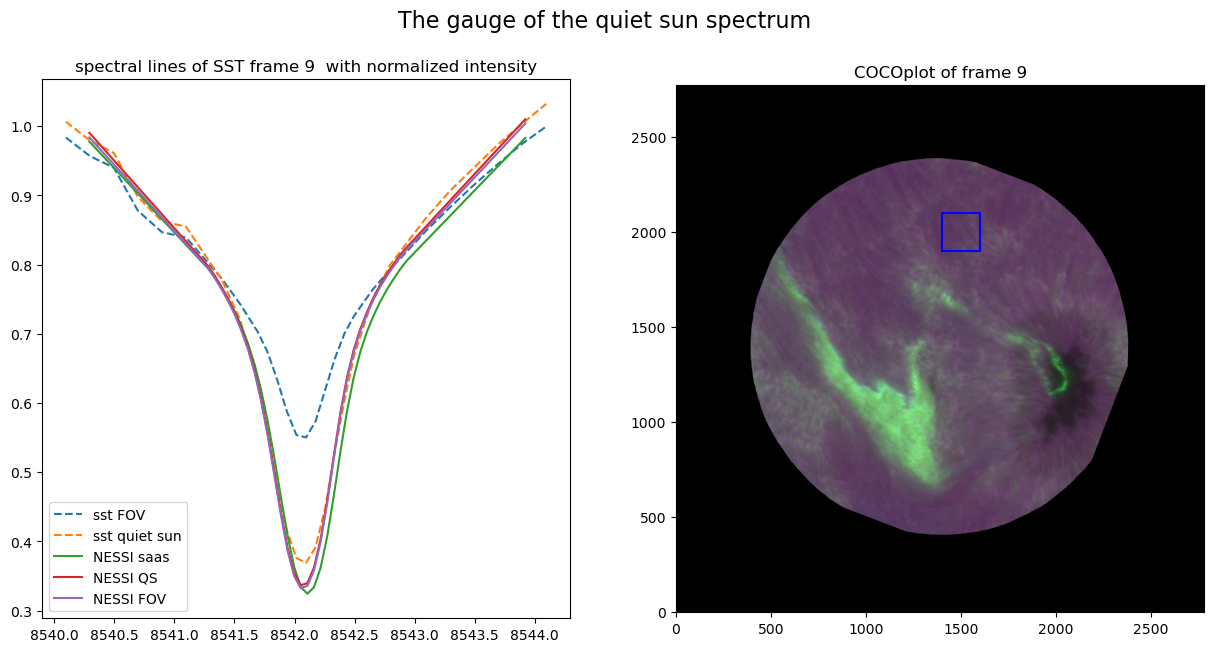

In [28]:
reload(un)
un.fit_qs_to_NESSI(theor_CaIR, CaIR)

Here it seems that there is that the altlas is horizontally elongated compared to the data. Maybe its important to remark this!

--------------------------------------------------------------------------------------------------
tot hier

## The full FOV integrated spectrum over time:

In [29]:
sst_data = CaIR
CaIR.shape

(58, '??', 27, 2773, 2780)

In [30]:
CaIR.calculate__FOV_spect_over_time()

In [31]:
sst_data.quiet_sun

{'frame': 9, 'xlim': (1400, 1600), 'ylim': (1900, 2100), 'color': 'blue'}

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

The peak occurs at frame [7] at time ['t=17:07:24 UT'].


The areafactor for THIS flare is 0.0020500714267716598 compared to 60**2/np.pi/959.63**2 = 0.0012443569999152702.        
However normaly this should be alike and since the gauge is bij the Quiet sun, the conversion should be oké.        
Percentage: 164.75%.


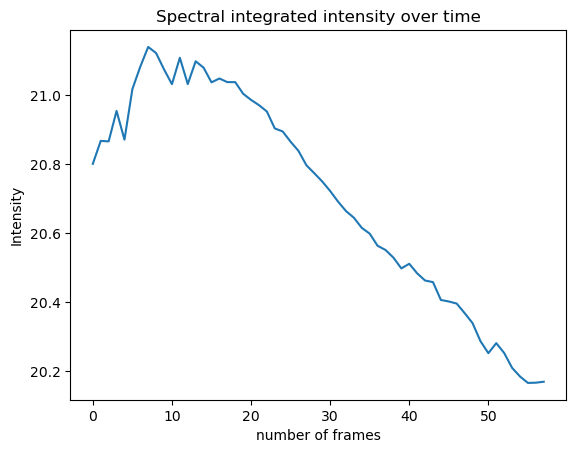

In [32]:
reload(un)
un.save_for_further_analysis(CaIR, theor_CaIR)


# Movie Making

In [33]:
# fill in here all arguments
theor_line = theor_CaIR
sst_data = CaIR
name_of_flare = "M2.5"
name_of_line = "CaIR"

un.Movie_making(theor_line, sst_data, name_of_flare, name_of_line, step=1, show_boundary=False)

The filename E:/solar flares/data/animations/M25_CaIR_animation.mp4 already exist


In [ ]:
exit()

: 